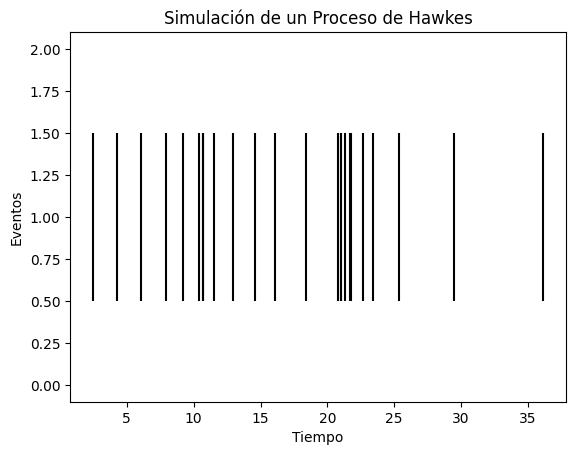

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes(lambda_0, alpha, beta, T, max_events=1000):
    times = []         # Lista para almacenar los tiempos de los eventos
    current_time = 0   # Tiempo actual
    lambda_t = lambda_0  # Intensidad actual

    while current_time < T and len(times) < max_events:
        # Calcular el tiempo de espera hasta el siguiente evento
        wait_time = np.random.exponential(scale=1/lambda_t)
        current_time += wait_time
        
        # Actualizar la intensidad después de cada evento
        lambda_t = lambda_0 + alpha * sum(np.exp(-beta * (current_time - np.array(times))))
        
        # Registrar el evento
        times.append(current_time)

    return times

# Parámetros del modelo
lambda_0 = 0.5
alpha = 0.8
beta = 1.5
T = 30

# Simulación
simulated_times = simulate_hawkes(lambda_0, alpha, beta, T)

# Visualización
plt.eventplot(simulated_times, orientation='horizontal', color='black')
plt.xlabel('Tiempo')
plt.ylabel('Eventos')
plt.title('Simulación de un Proceso de Hawkes')
plt.show()


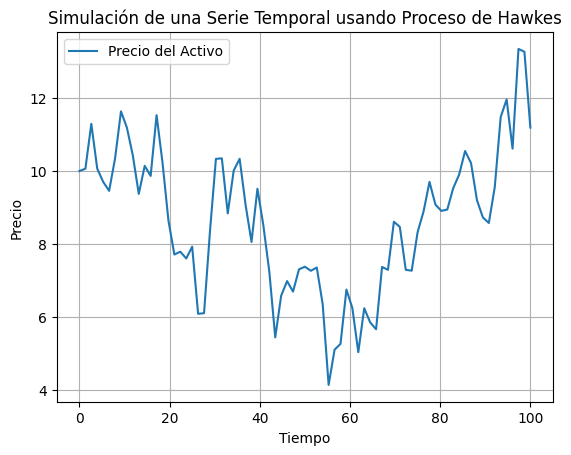

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_hawkes_series(lambda_0, alpha, beta, T, max_events=1000, initial_price=100):
    times = []          # Lista para almacenar los tiempos de los eventos
    current_time = 0    # Tiempo actual
    lambda_t = lambda_0 # Intensidad actual
    price_series = [initial_price]  # Lista para almacenar los precios

    while current_time < T and len(times) < max_events:
        # Calcular el tiempo de espera hasta el siguiente evento
        wait_time = np.random.exponential(scale=1/lambda_t)
        current_time += wait_time
        
        # Actualizar la intensidad después de cada evento
        lambda_t = lambda_0 + alpha * sum(np.exp(-beta * (current_time - np.array(times))))
        
        # Registrar el evento
        times.append(current_time)
        
        # Generar un cambio de precio aleatorio
        price_change = np.random.normal(loc=0, scale=1)  # Puedes ajustar loc y scale para mayor realismo
        new_price = price_series[-1] + price_change
        price_series.append(new_price)

    # Generar una serie temporal de tiempos
    time_series = np.linspace(0, T, len(price_series))
    
    return time_series, price_series

# Parámetros del modelo
lambda_0 = 0.5
alpha = 0.8
beta = 1.5
T = 100
initial_price = 10

# Simulación
time_series, price_series = simulate_hawkes_series(lambda_0, alpha, beta, T, initial_price=initial_price)

# Visualización de la serie temporal
plt.plot(time_series, price_series, label='Precio del Activo')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.title('Simulación de una Serie Temporal usando Proceso de Hawkes')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
eventos_si_no

Date
2024-01-02    False
2024-01-03     True
2024-01-04    False
2024-01-05    False
2024-01-08     True
              ...  
2024-07-30     True
2024-07-31     True
2024-08-01     True
2024-08-02     True
2024-08-05     True
Name: Return, Length: 149, dtype: bool

$ R_t = (P_t-P_{t-1}) / P_t$

[*********************100%%**********************]  1 of 1 completed


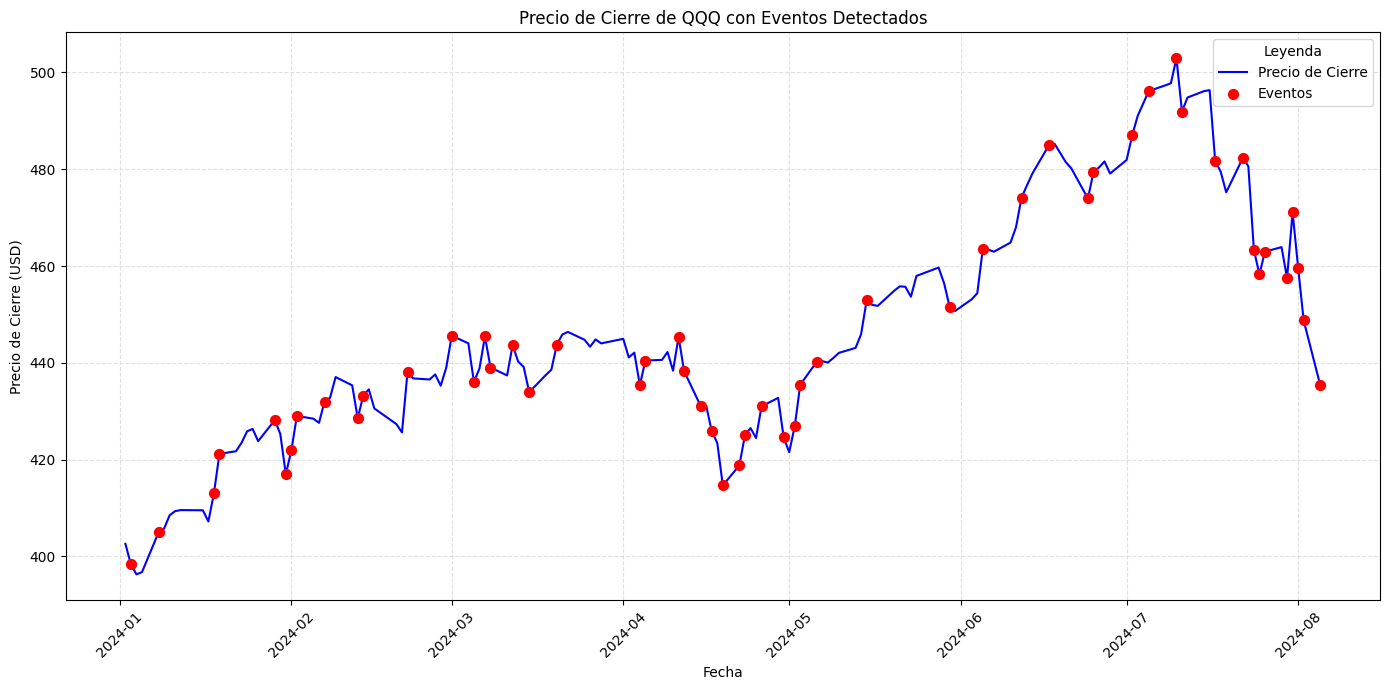

In [7]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Descargar los datos de QQQ
Ticket = 'QQQ'
ahora = datetime.now().strftime("%Y-%m-%d")
data = yf.download(Ticket, start="2024-01-01", end=ahora, interval='1d')

# Calcular los retornos diarios
data['Return'] = data['Close'].pct_change()

# Establecer un umbral para detectar eventos (e.g., 1% de cambio)
threshold = 0.01
eventos_si_no = data['Return'].abs() > threshold

# Crear una serie de eventos basada en el umbral
events = data.index[eventos_si_no]

# Crear la figura y los ejes
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Precio de Cierre', color='blue')

# Agregar los eventos como puntos
plt.scatter(events, data.loc[events, 'Close'], color='red', label='Eventos', s=50, zorder=5)

# Personalizar el diseño de la gráfica
plt.title('Precio de Cierre de QQQ con Eventos Detectados')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend(title='Leyenda')
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)

# Mejorar la visualización de las fechas en el eje x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Mostrar la figura
plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_58130/267944486.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_price = data['Close'][-1]  # Precio inicial


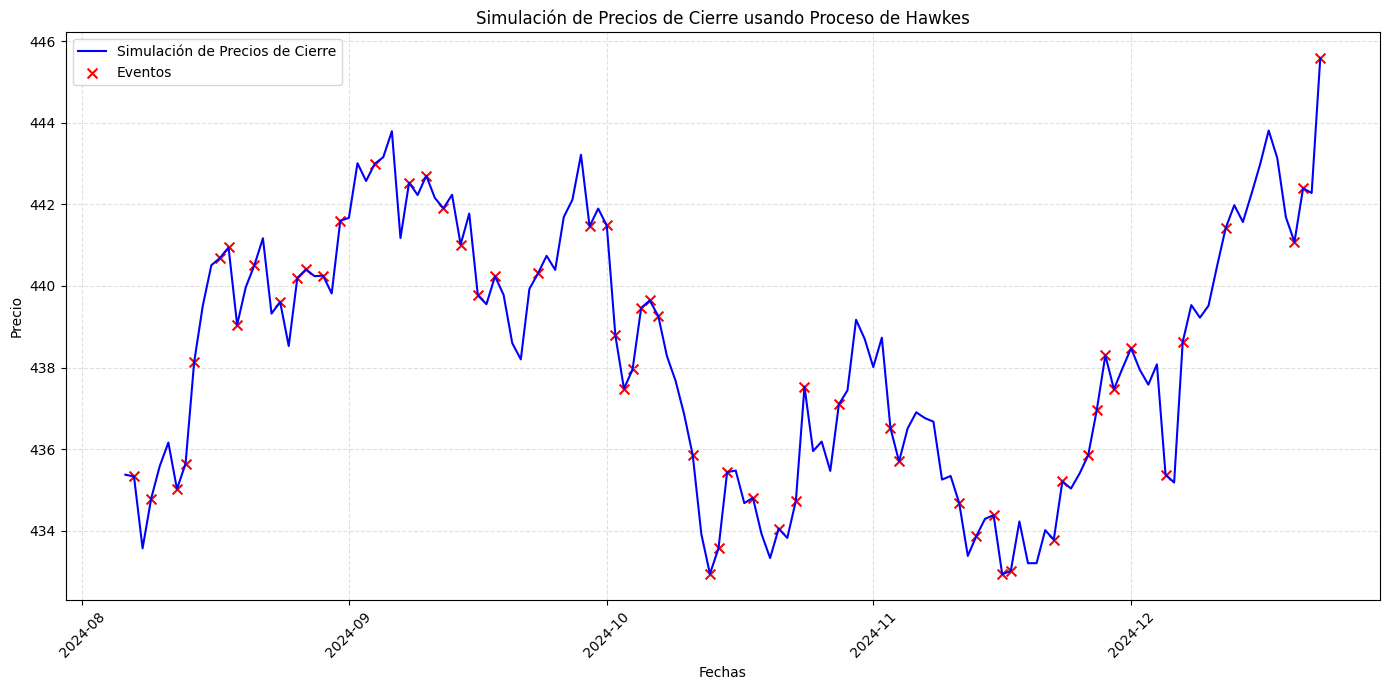

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Importamos pandas para manejar las fechas
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime

# Descargar los datos de QQQ
Ticket = 'QQQ'
ahora = datetime.now().strftime("%Y-%m-%d")
data = yf.download(Ticket, start="2024-01-01", end=ahora, interval='1d')

# Calcular los retornos diarios
data['Return'] = data['Close'].pct_change()

# Establecer un umbral para detectar eventos (e.g., 1% de cambio)
threshold = 0.01
eventos_si_no = data['Return'].abs() > threshold


def funcion_intensidad(mu, alpha, beta, eventos, tiempos):
    # Calcula la intensidad actual del proceso de Hawkes
    return mu + alpha * np.sum(eventos * np.exp(-beta * (len(eventos) + 1 - tiempos)))


def simulated_hawkes_closing_prices(eventos, lambda_0, alpha, beta, initial_price, daily_volatility, start_date, num_days=30):
    number_events = len(eventos)

    eventos_historicos = list(eventos)  # Convertir a lista para modificarla

    # Crear un array de tiempos para los eventos históricos
    historical_times = np.arange(1, number_events + 1)

    # Lista para almacenar precios de cierre
    prices = [initial_price]

    current_intensity = lambda_0  # Intensidad actual

    simulated_events = np.zeros(1)

    for i in range(1, num_days + 1):
        # Actualiza los tiempos históricos añadiendo el nuevo tiempo
        historical_times = np.append(historical_times, number_events + i)

        P = 1 - np.exp(-current_intensity)

        price_change = 0  # Inicializar el cambio de precio para el día

        if np.random.uniform() < P:
            eventos_historicos.append(1)
            # Calcula el cambio de precio basado en el número de eventos
            event_price_change = np.random.normal(loc=0, scale=daily_volatility)
            price_change += event_price_change
            simulated_events = np.append(simulated_events, 1)
        else:
            simulated_events = np.append(simulated_events, 0)
            eventos_historicos.append(0)

        # Actualiza la intensidad actual del proceso de Hawkes
        current_intensity = funcion_intensidad(lambda_0, alpha, beta, eventos_historicos, historical_times)

        price_change += np.random.normal(loc=0, scale=daily_volatility)
        new_price = prices[-1] + price_change
        prices.append(new_price)

    # Generar las fechas desde la fecha de inicio
    dates = pd.date_range(start=start_date, periods=num_days + 1)  # +1 para incluir el día inicial

    return dates, prices, simulated_events


# Parámetros del modelo
tiempos =  np.arange(1, len(eventos_si_no) + 1)
lambda_0 = funcion_intensidad(0.5,alpha,beta,eventos_si_no,tiempos) # Intensidad base
alpha = 0.8  # Impacto del evento
beta = 1.5  # Tasa de decaimiento
initial_price = data['Close'][-1]  # Precio inicial
daily_volatility = 1  # Volatilidad diaria
num_days = 140  # Número de días
start_date = '2024-08-06'  # Fecha de inicio

# Inicializar la lista de eventos
events = eventos_si_no  # [0, 1, 0, 0, 1, 0, 1, 0]  # Ejemplo de inicialización, reemplaza con tu 'eventos_si_no'

# Simulación de una sola trayectoria
dates, prices, simulated_events = simulated_hawkes_closing_prices(
    events, lambda_0, alpha, beta, initial_price, daily_volatility, start_date, num_days)

# Crear gráfico con Matplotlib
plt.figure(figsize=(14, 7))

# Añadir la línea de precios de cierre para la simulación
plt.plot(dates[:-1], prices[:-1], label='Simulación de Precios de Cierre', color='blue')

# Identificar los tiempos de eventos (donde los eventos son 1)
event_dates = [dates[i] for i, e in enumerate(simulated_events) if e == 1 and i < num_days]

# Añadir el scatter plot para eventos de la simulación
plt.scatter(event_dates, [prices[i] for i, e in enumerate(simulated_events) if e == 1 and i < num_days],
            color='red', marker='x', s=50, label='Eventos')

# Personalizar el diseño del gráfico
plt.title('Simulación de Precios de Cierre usando Proceso de Hawkes')
plt.xlabel('Fechas')
plt.ylabel('Precio')
plt.legend()
plt.grid(True, linestyle='--', color='lightgrey', alpha=0.7)

# Mejorar la visualización de las fechas en el eje x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


prices

In [24]:
simulated_events

array([0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1.])